In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline 

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32, shape=[None, 784],name="input")

In [4]:
stddev = np.sqrt(1.0 / 392)
h_W = tf.Variable(tf.truncated_normal([784,392], stddev=stddev)) 
h_b = tf.Variable(tf.constant(0.1, shape=[392]))
h_y = tf.nn.relu(tf.matmul(X, h_W) + h_b)

In [5]:
stddev = np.sqrt(1.0 / 784)
W = tf.Variable(tf.truncated_normal([392,784], stddev=stddev)) 
b = tf.Variable(tf.constant(0.1, shape=[784]))
y = tf.nn.xw_plus_b(h_y,W,b,name="output")

In [6]:
### 損失
loss = tf.reduce_mean(tf.pow(y - X, 2))

### 学習op
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(loss)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 20
start = time.time()
for i in range(50):
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_step,feed_dict={X: batch[0]})
    if i % 10 == 0:
        train_loss = sess.run(loss, feed_dict={X: batch[0]})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 0.143337
Time : 0.022471
[Train] step: 10, loss: 0.115246
Time : 0.074842
[Train] step: 20, loss: 0.088188
Time : 0.122192
[Train] step: 30, loss: 0.084714
Time : 0.170204
[Train] step: 40, loss: 0.073143
Time : 0.276749


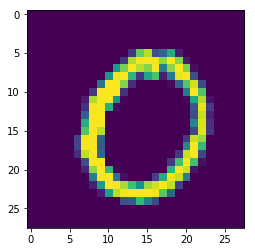

In [17]:
orig_img = mnist.test.images[101]
plt.imshow(np.array(orig_img).reshape(28,28))

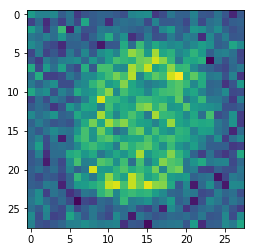

In [19]:
decode_img = sess.run(y,feed_dict={X:[orig_img]})
plt.imshow(np.array(decode_img).reshape(28,28))

In [21]:
# 学習をもう少し続けてみる
batch_size = 20
start = time.time()
for i in range(100):
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_step,feed_dict={X: batch[0]})
    if i % 20 == 0:
        train_loss = sess.run(loss, feed_dict={X: batch[0]})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 0.059334
Time : 0.010037
[Train] step: 20, loss: 0.062277
Time : 0.143480
[Train] step: 40, loss: 0.062551
Time : 0.219238
[Train] step: 60, loss: 0.052020
Time : 0.366013
[Train] step: 80, loss: 0.049555
Time : 0.458608


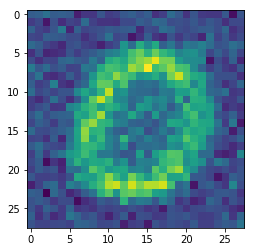

In [22]:
decode_img = sess.run(y,feed_dict={X:[orig_img]})
plt.imshow(np.array(decode_img).reshape(28,28))

In [24]:
# もう一度学習を続ける
batch_size = 30
start = time.time()
for i in range(300):
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_step,feed_dict={X: batch[0]})
    if i % 30 == 0:
        train_loss = sess.run(loss, feed_dict={X: batch[0]})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 0.025414
Time : 0.010797
[Train] step: 30, loss: 0.026780
Time : 0.195797
[Train] step: 60, loss: 0.024243
Time : 0.389733
[Train] step: 90, loss: 0.023638
Time : 0.532278
[Train] step: 120, loss: 0.021230
Time : 0.757410
[Train] step: 150, loss: 0.020311
Time : 0.914464
[Train] step: 180, loss: 0.019867
Time : 1.072816
[Train] step: 210, loss: 0.019485
Time : 1.210943
[Train] step: 240, loss: 0.018663
Time : 1.363178
[Train] step: 270, loss: 0.019170
Time : 1.500984


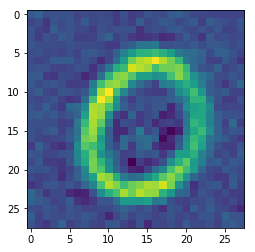

In [25]:
decode_img = sess.run(y,feed_dict={X:[orig_img]})
plt.imshow(np.array(decode_img).reshape(28,28))

In [26]:
# がっつり学習させる
batch_size = 30
start = time.time()
for i in range(1000):
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_step,feed_dict={X: batch[0]})
    if i % 100 == 0:
        train_loss = sess.run(loss, feed_dict={X: batch[0]})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 0.017968
Time : 0.010133
[Train] step: 100, loss: 0.015501
Time : 0.587333
[Train] step: 200, loss: 0.015282
Time : 1.057180
[Train] step: 300, loss: 0.012776
Time : 1.675321
[Train] step: 400, loss: 0.012844
Time : 2.174287
[Train] step: 500, loss: 0.011244
Time : 2.743816
[Train] step: 600, loss: 0.011378
Time : 3.417403
[Train] step: 700, loss: 0.009515
Time : 3.954003
[Train] step: 800, loss: 0.009043
Time : 4.448592
[Train] step: 900, loss: 0.008362
Time : 5.019379


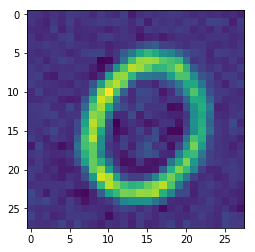

In [27]:
decode_img = sess.run(y,feed_dict={X:[orig_img]})
plt.imshow(np.array(decode_img).reshape(28,28))